<a href="https://colab.research.google.com/github/Dichtael/TDS2324-TrafficAccidents/blob/EDA/EDA_CrashPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorative Data Analysis
In this phase of Explorative Data Analysis, our objective is to gain a comprehensive understanding of the dataset and to make an informed decision about which city's data to use for collecting images and training our model. We aim to explore various aspects of the data, such as the distribution of accidents, the types of accidents, and the involvement of different vehicle types and participants.

**Key Focus Areas:**    
**1. Dataset Introduction:**    
Present an overview of the dataset, including its size, scope, and the nature of the data collected.

**2. Accident Distribution:**   
Analyze the geographic and temporal distribution of accidents. This includes identifying cities with high accident frequencies.

**3. Accident Types and Participants:**   
Examine the types of accidents, such as 'sonstige' (involving buses or trams), and the participants involved, especially focusing on groups like bicycle riders.

**4. Decision on Target City:**   
Based on the analysis, identify a city with a high volume of car accidents. This city would ideally offer a diverse range of images for the model, allowing for a more robust and comprehensive training.


The goal of this EDA is not only to delve into the dataset for a deeper understanding but also to strategically choose a city that will provide a rich and varied set of images for effectively training our predictive mode

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Introduction of the dataset
In this subsection we want to provide a brief overview of the dataset before we start our analysis.

In [8]:
data = pd.read_csv('C:\\Projekte\TDS\\TDS2324-TrafficAccidents\\Data\\TrafficAccidentData\\all_16_22.csv', dtype={'ags':str})
data.head()

,Unnamed: 0,land,regbez,kreis,gemeinde,jahr,monat,stunde,wochentag,kategorie,...,strzustand,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,xgcswgs84,ygcswgs84,ags
0,0,1,0,53,120,2016,1,9,5,2,...,2,0,1,0,0,0.0,0,10.621659,53.729615,01053120
1,1,1,0,57,10,2016,1,17,3,3,...,1,0,1,0,0,0.0,0,10.149176,54.245453,01057010
2,2,1,0,62,8,2016,1,0,5,3,...,0,0,1,0,0,0.0,0,10.518094,53.820403,01062008
3,3,1,0,3,0,2016,1,15,5,3,...,0,1,0,0,0,0.0,1,10.683021,53.851243,01003000
4,4,1,0,55,28,2016,1,14,1,3,...,2,0,1,0,0,0.0,0,10.620986,54.219459,01055028


In [9]:
data = data.drop(columns=["Unnamed: 0"])
data.head()

,land,regbez,kreis,gemeinde,jahr,monat,stunde,wochentag,kategorie,art,...,strzustand,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,xgcswgs84,ygcswgs84,ags
0,1,0,53,120,2016,1,9,5,2,8,...,2,0,1,0,0,0.0,0,10.621659,53.729615,01053120
1,1,0,57,10,2016,1,17,3,3,1,...,1,0,1,0,0,0.0,0,10.149176,54.245453,01057010
2,1,0,62,8,2016,1,0,5,3,9,...,0,0,1,0,0,0.0,0,10.518094,53.820403,01062008
3,1,0,3,0,2016,1,15,5,3,5,...,0,1,0,0,0,0.0,1,10.683021,53.851243,01003000
4,1,0,55,28,2016,1,14,1,3,8,...,2,0,1,0,0,0.0,0,10.620986,54.219459,01055028


In [4]:
print(data.isnull().sum())

land            0
regbez          0
kreis           0
gemeinde        0
jahr            0
monat           0
stunde          0
wochentag       0
kategorie       0
art             0
typ             0
licht           0
strzustand      0
ist_rad         0
ist_pkw         0
ist_fuss        0
ist_krad        0
ist_gkfz        0
ist_sonstige    0
linrefx         0
linrefy         0
xgcswgs84       0
ygcswgs84       0
ags             0
dtype: int64


In [5]:
print(data.info)

<bound method DataFrame.info of          land  regbez  kreis  gemeinde  jahr  monat  stunde  wochentag  \
0           1       0     54        84  2022      2      19          6   
1           1       0     57        44  2022      5      11          1   
2           1       0     59        73  2022      5      12          1   
3           1       0      3         0  2022      5       8          3   
4           1       0     61        46  2022      4      19          3   
...       ...     ...    ...       ...   ...    ...     ...        ...   
1554689    10       0     41       100  2017     12       8          3   
1554690    10       0     45       114  2017     12      15          2   
1554691    10       0     41       100  2017     12      18          2   
1554692    10       0     45       114  2017     12      17          1   
1554693    10       0     43       114  2017     12      18          1   

         kategorie  art  ...  ist_pkw  ist_fuss  ist_krad  ist_gkfz  \
0       

# Renaming of Columns and Filling with Categorical Values:
To get a better understanding, the numerical values for the eda are replaced with categorical values. The 'DSB_Unfallatlas.pdf' file describes the numeric values.

**Filling Land with Categorical Values:**

In [11]:
data['land'] = data['land'].replace(1, 'Schleswig-Holstein')
data['land'] = data['land'].replace(2, 'Hamburg')
data['land'] = data['land'].replace(3, 'Niedersachsen')
data['land'] = data['land'].replace(4, 'Bremen')
data['land'] = data['land'].replace(5, 'NRW')
data['land'] = data['land'].replace(6, 'Hessen')
data['land'] = data['land'].replace(7, 'RLP')
data['land'] = data['land'].replace(8, 'BaWü')
data['land'] = data['land'].replace(9, 'Bayern')
data['land'] = data['land'].replace(10, 'Saarland')
data['land'] = data['land'].replace(11, 'Berlin')
data['land'] = data['land'].replace(12, 'Brandenburg')
data['land'] = data['land'].replace(13, 'MeckPom')
data['land'] = data['land'].replace(14, 'Sachsen')
data['land'] = data['land'].replace(15, 'Sachsen-Anhalt')
data['land'] = data['land'].replace(16, 'Thüringen')

In [23]:
data['licht'] = data['licht'].replace(0, 'tageslicht')
data['licht'] = data['licht'].replace(1, 'dämmerung')
data['licht'] = data['licht'].replace(2, 'dunkelheit')

In [14]:
data['wochentag'] = data['wochentag'].replace(1, 'Sonntag')
data['wochentag'] = data['wochentag'].replace(2, 'Montag')
data['wochentag'] = data['wochentag'].replace(3, 'Dienstag')
data['wochentag'] = data['wochentag'].replace(4, 'Mittwoch')
data['wochentag'] = data['wochentag'].replace(5, 'Donnerstag')
data['wochentag'] = data['wochentag'].replace(6, 'Freitag')
data['wochentag'] = data['wochentag'].replace(7, 'Samstag')

In [15]:
data['kategorie'] = data['kategorie'].replace(1, 'tödlich')
data['kategorie'] = data['kategorie'].replace(2, 'schwer')
data['kategorie'] = data['kategorie'].replace(3, 'leicht')
data['verletzung'] = data['kategorie']

In [16]:
data['art'] = data['art'].replace(1, 'mit anfahrendem auto')
data['art'] = data['art'].replace(2, 'mit vorausfahrendem auto')
data['art'] = data['art'].replace(3, 'seitlich in gleicher richtung')
data['art'] = data['art'].replace(4, 'mit entgegenkommendem auto')
data['art'] = data['art'].replace(5, 'mit abbiegenden auto')
data['art'] = data['art'].replace(6, 'auto mit fussgänger')
data['art'] = data['art'].replace(7, 'mit hindernis')
data['art'] = data['art'].replace(8, 'abkommen von straße rechts')
data['art'] = data['art'].replace(9, 'abkommen von straße links')
data['art'] = data['art'].replace(0, 'sonstiges')
data['zusammenstoß'] = data['art']

In [17]:
data['typ'] = data['typ'].replace(1, 'fahrunfall')
data['typ'] = data['typ'].replace(2, 'abbiegeunfall')
data['typ'] = data['typ'].replace(3, 'kreuzungsunfall')
data['typ'] = data['typ'].replace(4, 'überschreitenunfall')
data['typ'] = data['typ'].replace(5, 'durch ruhenden Verkehr')
data['typ'] = data['typ'].replace(6, 'im längsverkehr')
data['typ'] = data['typ'].replace(7, 'sonstiges')
data['unfallsituation'] = data['typ']

In [18]:
data = data.drop(columns=['kategorie'])
data = data.drop(columns=['art'])
data = data.drop(columns=['typ'])

In [25]:
data.head()

,land,regbez,kreis,gemeinde,jahr,monat,stunde,wochentag,licht,strzustand,...,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,xgcswgs84,ygcswgs84,ags,verletzung,zusammenstoß,unfallsituation
0,Schleswig-Holstein,0,53,120,2016,1,9,Donnerstag,daylight,2,...,0,0,0.0,0,10.621659,53.729615,01053120,schwer,abkommen von straße rechts,fahrunfall
1,Schleswig-Holstein,0,57,10,2016,1,17,Dienstag,darkness,1,...,0,0,0.0,0,10.149176,54.245453,01057010,leicht,mit anfahrendem auto,im längsverkehr
2,Schleswig-Holstein,0,62,8,2016,1,0,Donnerstag,darkness,0,...,0,0,0.0,0,10.518094,53.820403,01062008,leicht,abkommen von straße links,sonstiges
3,Schleswig-Holstein,0,3,0,2016,1,15,Donnerstag,daylight,0,...,0,0,0.0,1,10.683021,53.851243,01003000,leicht,mit abbiegenden auto,kreuzungsunfall
4,Schleswig-Holstein,0,55,28,2016,1,14,Sonntag,daylight,2,...,0,0,0.0,0,10.620986,54.219459,01055028,leicht,abkommen von straße rechts,fahrunfall


# Summary Statistics

**Some Summary Statstics to Explore the Scope of the Data**

In [26]:
print("In 2016-2022 there were {:,} accidents in Munich.".format(len(data))) 
print("{:,} of the accidents ended fatally while in {:,} of the cases the passengers survived.".format((data['verletzung'] == 'tödlich').sum(), (data['verletzung'] == 'schwer').sum()+(data['verletzung'] == 'leicht').sum()))
print("{:,} of the crashes happended in darkness, {:,} of the crashes happened in dawn lighting, while {:,} happened during daylight".format((data['licht'] == 'darkness').sum(), (data['licht'] == 'dawn').sum(), (data['licht'] == 'daylight').sum()))

In 2016-2022 there were 1,554,694 accidents in Munich.
15,578 of the accidents ended fatally while in 1,539,116 of the cases the passengers survived.
292,310 of the crashes happended in darkness, 83,098 of the crashes happened in dawn lighting, while 1,179,286 happened during daylight


# Geographic Analysis

**Heatmap of Car Crashes in the viewed Region**

In [27]:
# check wich german city has most accidents
most_accidents_ags = data['ags'].value_counts()
most_accidents_ags.head()

ags
09162000    33806
06412000    17220
05315000    16671
04011000    15672
14612000    14513
Name: count, dtype: int64

The AGS stands for:

- 09162000 = Munich
- 06412000 = Frankfurt
- 05315000 = Cologne
- 04011000 = Bremen
- 14612000 = Dresden

Given the availability of high-quality satellite images and an obvious extensive traffic accident data specific to Munich, we will focus on traffic accident images from this city for the project.

In [15]:
# saving the data for the city of munich
munich = data[data['ags'] == '09162000']
munich_wgs = munich[['xgcswgs84', 'ygcswgs84']]
munich.head()

,land,regbez,kreis,gemeinde,jahr,monat,stunde,wochentag,licht,strzustand,...,ist_gkfz,ist_sonstige,linrefx,linrefy,xgcswgs84,ygcswgs84,ags,verletzung,zusammenstoß,unfallsituation
95144,Bayern,1,62,0,2022,1,12,Samstag,daylight,0,...,0.0,0,693842.154441,5.331647e+06,11.604141,48.108560,09162000,leicht,mit vorausfahrendem auto,kreuzungsunfall
95421,Bayern,1,62,0,2022,1,9,Samstag,daylight,0,...,0.0,0,688792.974622,5.339434e+06,11.539832,48.180074,09162000,leicht,abkommen von straße links,sonstiges
95509,Bayern,1,62,0,2022,1,12,Mittwoch,daylight,0,...,0.0,0,693552.765631,5.331547e+06,11.600212,48.107752,09162000,schwer,abkommen von straße rechts,fahrunfall
95788,Bayern,1,62,0,2022,1,14,Samstag,daylight,1,...,0.0,0,677943.893723,5.335310e+06,11.392290,48.146132,09162000,leicht,mit entgegenkommendem auto,abbiegeunfall
95970,Bayern,1,62,0,2022,1,13,Freitag,daylight,1,...,0.0,0,694640.792260,5.334487e+06,11.616156,48.133848,09162000,leicht,mit vorausfahrendem auto,im längsverkehr


/var/folders/0_/pzrrz1wd5g58htdyqxvs5lvm0000gn/T/ipykernel_1129/2951896838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  munich_wgs['ygcswgs84'] = munich_wgs['ygcswgs84'].astype('float32')
/var/folders/0_/pzrrz1wd5g58htdyqxvs5lvm0000gn/T/ipykernel_1129/2951896838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  munich_wgs['xgcswgs84'] = munich_wgs['xgcswgs84'].astype('float32')
/var/folders/0_/pzrrz1wd5g58htdyqxvs5lvm0000gn/T/ipykernel_1129/2951896838.py:7: FutureWarning: 

`shade` is now deprecate

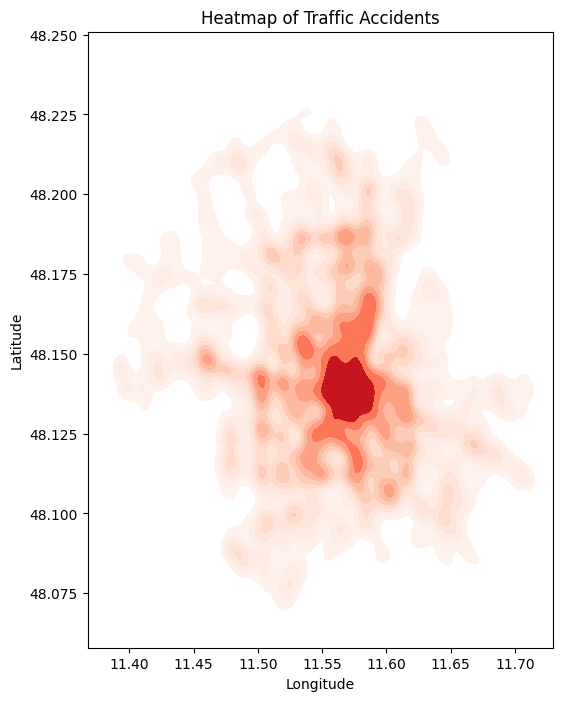

In [16]:
munich_wgs['ygcswgs84'] = munich_wgs['ygcswgs84'].astype('float32')
munich_wgs['xgcswgs84'] = munich_wgs['xgcswgs84'].astype('float32')

#sample_data = data.sample(n=10000)

plt.figure(figsize=(6, 8))
sns.kdeplot(data=munich_wgs, x='xgcswgs84', y='ygcswgs84', cmap="Reds", shade=True, bw_adjust=0.5, n_levels=10)

plt.title('Heatmap of Traffic Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

*   the city center of Munich can be identified thorugh the heatmap as a crash hotspot
*   streets and their intersections can also be easily identified through the colorization of the heatmap

**Distrubution of Crashes in the Viewed Region**

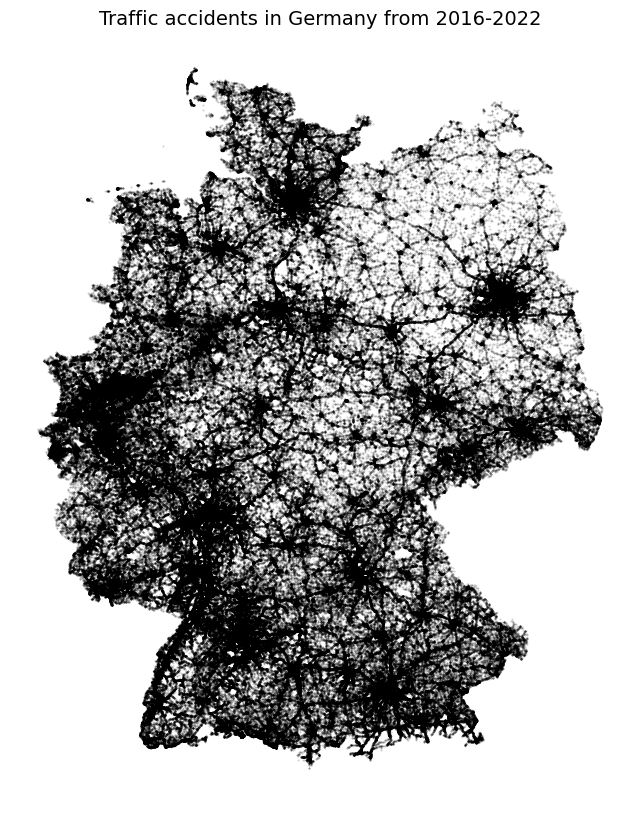

In [17]:
plt.figure(figsize=(8,10))
plt.scatter(data['xgcswgs84'], data['ygcswgs84'], s=0.2, alpha=0.2, color='black')
plt.title('Traffic accidents in Germany from 2016-2022', fontsize=14)
plt.axis('off')
plt.show()

*  the whole infrastructure of Germany can be derived form this plot that only displays car crashes
*  also one can identify areas with low population density like the north-east as well as hotspot areas like the Ruhrgebiet and the bigger cities like Berlin, Hamburg, Stuttgart, Munich.

# Temporal Analysis

**Histogram of Crashes over Years and Months**

In [18]:
# Group by year and month, and calculate the sum of crash counts
monthly_crashes = data.groupby(['jahr', 'monat'])['zusammenstoß'].count().reset_index()
monthly_crashes['crashes'] = monthly_crashes['zusammenstoß']
monthly_crashes = monthly_crashes.drop(columns=['zusammenstoß'])
monthly_crashes.head()

,jahr,monat,crashes
0,2016,1,9917
1,2016,2,8979
2,2016,3,10139
3,2016,4,12207
4,2016,5,13879


In [19]:
monthly_crashes.crashes.sum()

1554694

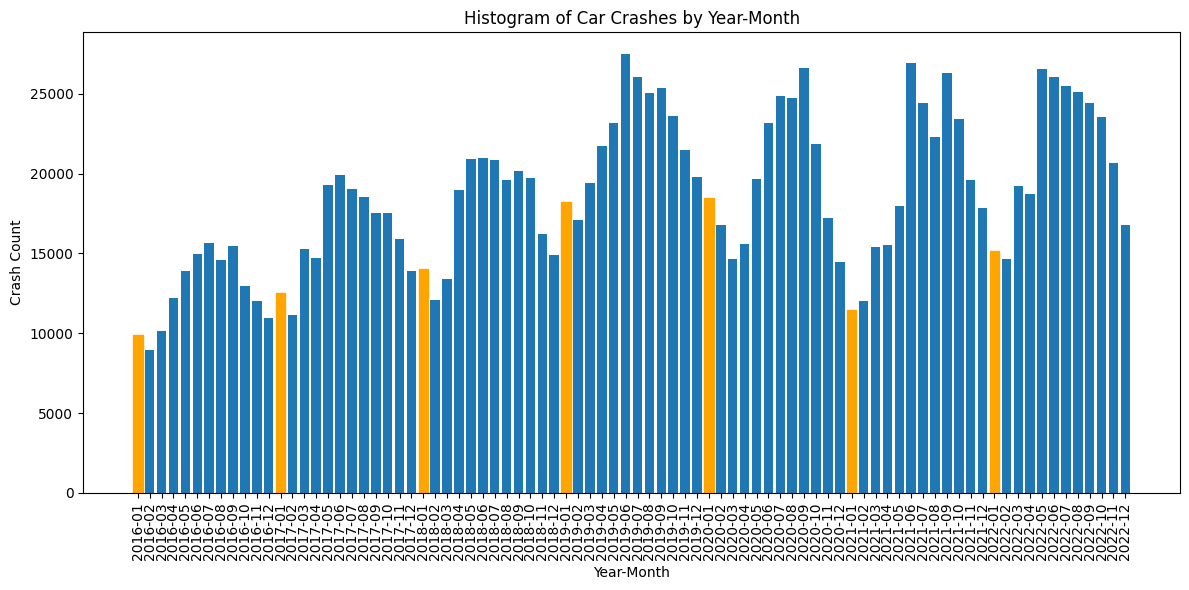

In [20]:
# Create the histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(
    range(len(monthly_crashes)),
    monthly_crashes['crashes'],
    tick_label=monthly_crashes.apply(lambda x: f'{x["jahr"]}-{x["monat"]:02d}', axis=1)
)

# Mark January bars in orange
for i, month in enumerate(monthly_crashes['monat']):
    if month == 1:  # January
        bars[i].set_color('orange')

plt.xlabel('Year-Month')
plt.ylabel('Crash Count')
plt.title('Histogram of Car Crashes by Year-Month')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



*   There appear to be peaks in the occurance of crashes in the months of june and may of every year except for 2020, where the highest amount of car crashes occured in sepember
*   In general the occurance of car crashes seems to rise throughout the displayed time period
*   It becomes more and more logarithmic with tendencies of skewness
*   Further, the traffic reduction resulting of pandemic indused quarantine and homeoffice policies can be observed in the plot between the end of 2020 and start 2021



**Distribution of Crashes throughout the Week**

In [21]:
# Group by day of week, and calculate the sum of crash counts
weekly_crashes = data.groupby(['wochentag'])['verletzung'].count().reset_index()
weekly_crashes['crashes'] = weekly_crashes['verletzung']
weekly_crashes = weekly_crashes.drop(columns=['verletzung'])
weekly_crashes.head()

,wochentag,crashes
0,Dienstag,242764
1,Donnerstag,245127
2,Freitag,254925
3,Mittwoch,242145
4,Montag,238129


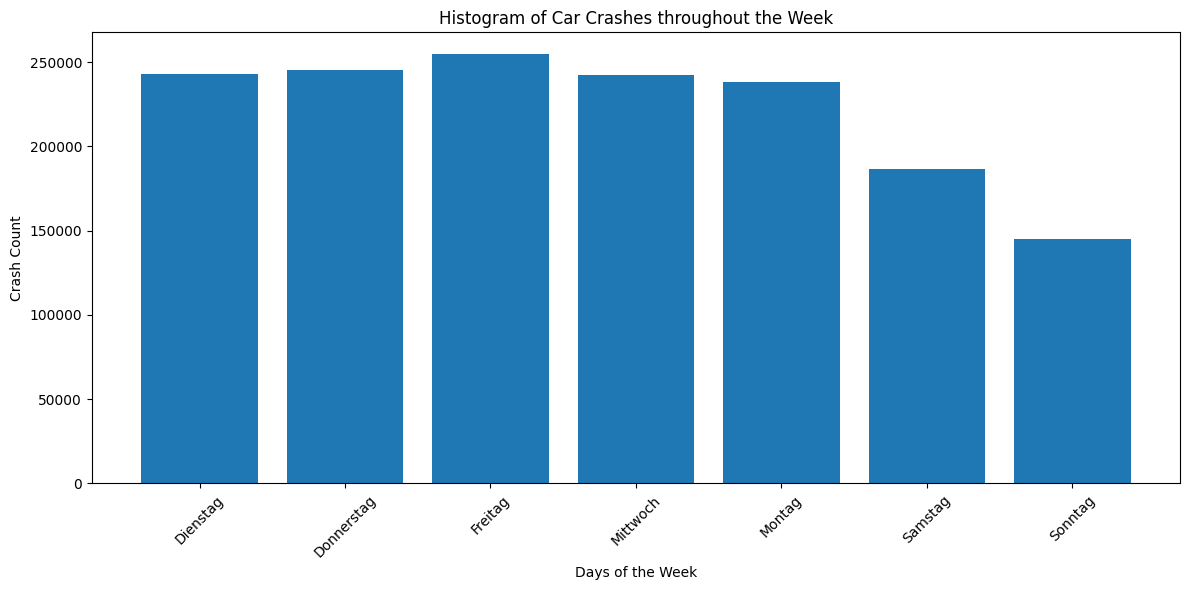

In [22]:
# Create the histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(
    range(len(weekly_crashes)),
    weekly_crashes['crashes'],
    tick_label=weekly_crashes['wochentag']
)

plt.xlabel('Days of the Week')
plt.ylabel('Crash Count')
plt.title('Histogram of Car Crashes throughout the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*  the lower traffic density on weekends can be derived from the plot since there are slightly less car carshes
*  the lowest risk for a car crash is on Sundays and the highest on Fridays

**Distribution over the Course of the Hours of a Day**

In [32]:
# Group by time of day, and calculate the sum of crash counts
daily_crashes = data.groupby(['stunde'])['verletzung'].count().reset_index()
daily_crashes['crashes'] = daily_crashes['verletzung']
daily_crashes = daily_crashes.drop(columns=['verletzung'])

# Calculate the proportion of each category
daily_crashes['tödlich'] = data[data['verletzung'] == 'tödlich'].groupby(['stunde'])['verletzung'].count() / daily_crashes['crashes']
daily_crashes['schwer'] = data[data['verletzung'] == 'schwer'].groupby(['stunde'])['verletzung'].count() / daily_crashes['crashes']
daily_crashes['leicht'] = data[data['verletzung'] == 'leicht'].groupby(['stunde'])['verletzung'].count() / daily_crashes['crashes']
daily_crashes.head()



,stunde,crashes,tödlich,schwer,leicht
0,0,14497,0.018487,0.235221,0.746292
1,1,10857,0.022106,0.246569,0.731325
2,2,9033,0.026791,0.252851,0.720359
3,3,7947,0.027306,0.253303,0.719391
4,4,9056,0.027385,0.249227,0.723388


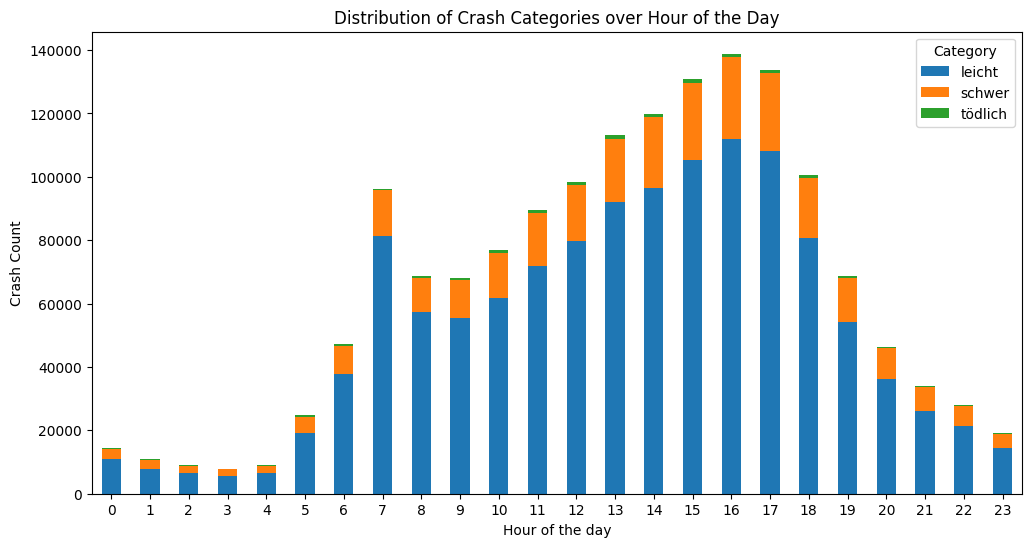

In [34]:
# Group by time of day and calculate the count of each category
hourly_crashes = data.groupby(['stunde', 'verletzung']).size().unstack()

# Create the plot
hourly_crashes.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hour of the day')
plt.ylabel('Crash Count')
plt.title('Distribution of Crash Categories over Hour of the Day')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.show()


*  the biggest amount of car crashes occurs at 4pm put peaks in general in the afternoon when people dirve home form work
*  it is the lowest at 3am but is fairly low between 21pm and 5am
*  there is a peak at 7am which is probabaly because streets are busy with people driving to work
*  the most severe accidents as well the accidents in total are the highest around afternoon

# Type and nature of Accidents

In [25]:
# Group by time of day, and calculate the sum of crash counts
typ_crashes = data.groupby(['unfallsituation'])['verletzung'].count().reset_index()
typ_crashes['crashes'] = typ_crashes['verletzung']
typ_crashes = typ_crashes.drop(columns=['verletzung'])
typ_crashes.head()

,unfallsituation,crashes
0,abbiegeunfall,213341
1,durch ruhenden Verkehr,48654
2,fahrunfall,298387
3,im längsverkehr,393425
4,kreuzungsunfall,348947


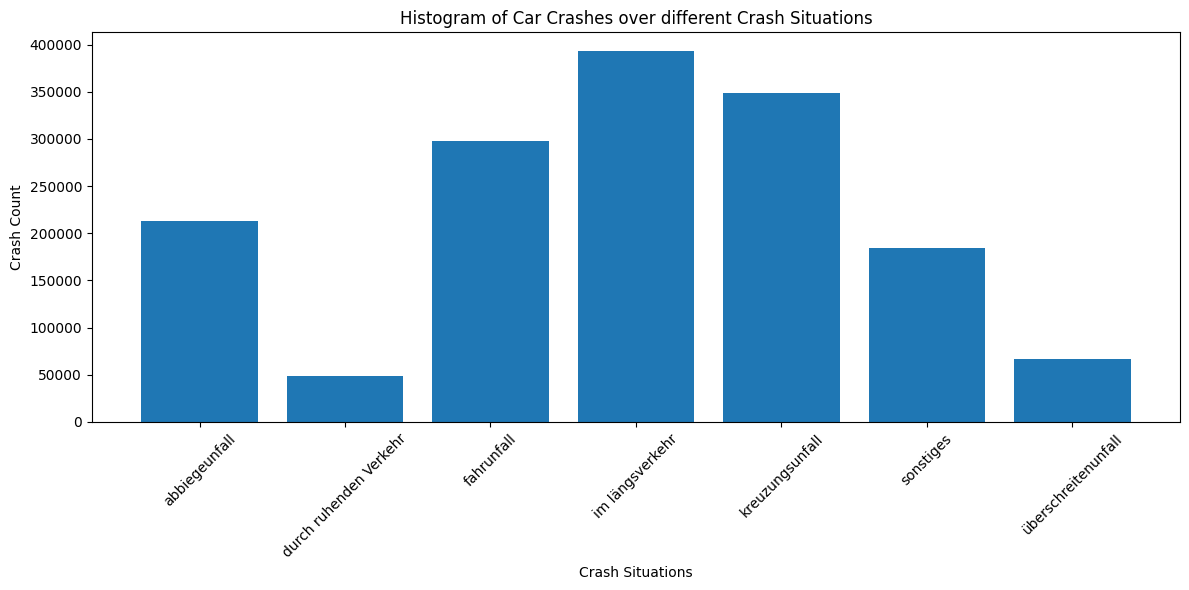

In [26]:
# Create the histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(
    range(len(typ_crashes)),
    typ_crashes['crashes'],
    tick_label=typ_crashes['unfallsituation']
)

plt.xlabel('Crash Situations')
plt.ylabel('Crash Count')
plt.title('Histogram of Car Crashes over different Crash Situations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*  most crashes happen "im längsverkehr" followed by accidents happenening in intersections
*  least crashes happen in "überschreiten unfall" und "durch ruhenden verkehr"

**Relationship between Nature of the Accident and Vehicle Type**

In [28]:
nature_crashes = data[['zusammenstoß', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_gkfz', 'ist_sonstige', 'ist_krad']].copy()
nature_crashes = nature_crashes.groupby('zusammenstoß').sum().reset_index()
nature_crashes.head()

,zusammenstoß,ist_rad,ist_pkw,ist_fuss,ist_gkfz,ist_sonstige,ist_krad
0,abkommen von straße links,3629,61622,332,2161.0,4603,11463
1,abkommen von straße rechts,10531,89014,575,3774.0,7987,26149
2,auto mit fussgänger,15822,88413,117858,1634.0,12161,2391
3,mit abbiegenden auto,188429,396669,1621,11374.0,41980,56964
4,mit anfahrendem auto,26751,85316,1010,4889.0,11554,10280


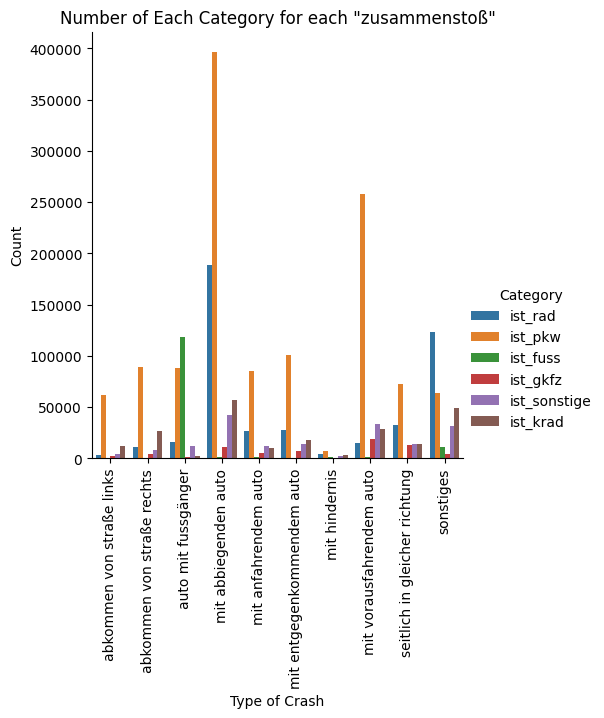

In [31]:
# Reshape the DataFrame to have categories as a single column
melted_df = nature_crashes.melt(id_vars=['zusammenstoß'], 
                                value_vars=['ist_rad', 'ist_pkw', 'ist_fuss', 'ist_gkfz', 'ist_sonstige', 'ist_krad'],
                                var_name='Category', value_name='Count')

# Create a single plot with different categories
sns.catplot(data=melted_df, x='zusammenstoß', y='Count', hue='Category', kind='bar')
plt.title('Number of Each Category for each "zusammenstoß"')
plt.xticks(rotation=90)
plt.xlabel('Type of Crash')
plt.show()

*  for almost all types of crashes the cars have the highest participation except for "auto mit fussgänger" the pedestrians logically have the highest participation
*  for "sonstige" accidents which include accidents with bus or tram the bike riders have the highest participation



**Percentage of each object of transportation in relation to the absolute number of accidents**

([<matplotlib.patches.Wedge at 0x21084f26c10>,
 [Text(0.8948031779415065, 0.6397868963536069, 'Bike'),
  Text(-1.0772791050699406, 0.22241791694849566, 'Car'),
  Text(0.11928793243139049, -1.093512866488659, 'Person'),
  Text(0.4166684901236106, -1.0180311239535413, 'Truck'),
  Text(0.7786602918119473, -0.7769737125252909, 'Motorbike'),
  Text(1.0685191872380753, -0.2612790586788067, 'Others')])

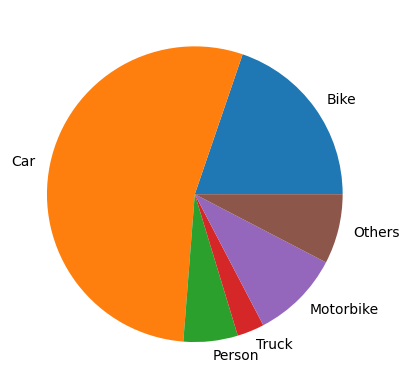

In [36]:
isBike = data.ist_rad.sum()
isPkw = data.ist_pkw.sum()
isPedestrian = data.ist_fuss.sum()
isGkfz = data.ist_gkfz.sum()
isKbike = data.ist_krad.sum()
isElse = data.ist_sonstige.sum()

sum = isBike + isPkw + isPedestrian + isGkfz + isKbike + isElse
labels = ['Bike', 'Car', 'Person', 'Truck', 'Motorbike', 'Others']
sizes = [isBike/sum, isPkw/sum, isPedestrian/sum, isGkfz/sum, isKbike/sum, isElse/sum]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)



*   Cars are involved in more than half of the total crashes
*   Bikes are involved in a little less than a fourth of the cases

